# FAKE NEWS DETECTION USING NLP (NATURAL LANGUAGE PROCESSING)

#### Importing basic libraries and loading dataset

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/harsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("news.csv")

#### Data analysis

In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


None

In [6]:
display(data.head(10))

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [7]:
data=data.reset_index(drop=True)

In [8]:
data=data.drop(['Unnamed: 0','title'],axis=1) #axis=1 means vertical column

In [9]:
print(data.columns)

Index(['text', 'label'], dtype='object')


In [10]:
data.head(10)

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
5,"\nI’m not an immigrant, but my grandparents ...",FAKE
6,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,A Czech stockbroker who saved more than 650 Je...,REAL
8,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iranian negotiators reportedly have made a las...,REAL


### Tokenization

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
data['text']=data['text'].apply(str)
data['text']=data['text'].apply(word_tokenize)

In [13]:
display(data.head(10))

,text,label
0,"[Daniel, Greenfield, ,, a, Shillman, Journalis...",FAKE
1,"[Google, Pinterest, Digg, Linkedin, Reddit, St...",FAKE
2,"[U.S., Secretary, of, State, John, F., Kerry, ...",REAL
3,"[—, Kaydee, King, (, @, KaydeeKing, ), Novembe...",FAKE
4,"[It, 's, primary, day, in, New, York, and, fro...",REAL
5,"[I, ’, m, not, an, immigrant, ,, but, my, gran...",FAKE
6,"[Share, This, Baylee, Luciani, (, left, ), ,, ...",FAKE
7,"[A, Czech, stockbroker, who, saved, more, than...",REAL
8,"[Hillary, Clinton, and, Donald, Trump, made, s...",REAL
9,"[Iranian, negotiators, reportedly, have, made,...",REAL


### Stemming

In [14]:
from nltk.stem.snowball import SnowballStemmer
porter=SnowballStemmer('english')

In [15]:
def stem_it(text):
  return [porter.stem(word) for word in text]

In [16]:
data['text']=data['text'].apply(stem_it)

In [17]:
display(data.head(10))

,text,label
0,"[daniel, greenfield, ,, a, shillman, journal, ...",FAKE
1,"[googl, pinterest, digg, linkedin, reddit, stu...",FAKE
2,"[u.s., secretari, of, state, john, f., kerri, ...",REAL
3,"[—, kayde, king, (, @, kaydeek, ), novemb, 9, ...",FAKE
4,"[it, 's, primari, day, in, new, york, and, fro...",REAL
5,"[i, ’, m, not, an, immigr, ,, but, my, grandpa...",FAKE
6,"[share, this, bayle, luciani, (, left, ), ,, s...",FAKE
7,"[a, czech, stockbrok, who, save, more, than, 6...",REAL
8,"[hillari, clinton, and, donald, trump, made, s...",REAL
9,"[iranian, negoti, report, have, made, a, last-...",REAL


### Stopword Removal

In [18]:
def stop_this(t): #function for removing stopwords
  dt=[word for word in t if len(word)>2]
  return dt

In [19]:
data['text']=data['text'].apply(stop_this)

In [20]:
display(data.head(10))

,text,label
0,"[daniel, greenfield, shillman, journal, fellow...",FAKE
1,"[googl, pinterest, digg, linkedin, reddit, stu...",FAKE
2,"[u.s., secretari, state, john, kerri, said, mo...",REAL
3,"[kayde, king, kaydeek, novemb, 2016, the, less...",FAKE
4,"[primari, day, new, york, and, front-runn, hil...",REAL
5,"[not, immigr, but, grandpar, are, more, than, ...",FAKE
6,"[share, this, bayle, luciani, left, screenshot...",FAKE
7,"[czech, stockbrok, who, save, more, than, 650,...",REAL
8,"[hillari, clinton, and, donald, trump, made, s...",REAL
9,"[iranian, negoti, report, have, made, last-dit...",REAL


In [21]:
data['text']=data['text'].apply(' '.join)

### Splitting train and test dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.20)
print("----------X_train----------")
display(X_train.head())
print("----------y_train----------")
display(y_train.head())

----------X_train----------


2332    the onli way save the world save yourself nov ...
2190    behind the headlin conspiraci cover-up ancient...
1220    more cathol are congress than ever befor and p...
2360    sustain salt water batteri n't corrod and can ...
5362    presid obama call peopl faith reject those who...
Name: text, dtype: object

----------y_train----------


2332    FAKE
2190    FAKE
1220    REAL
2360    FAKE
5362    REAL
Name: label, dtype: object

### Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
mtfidf=TfidfVectorizer(max_df=0.7)

tfidf_train=mtfidf.fit_transform(X_train)
tfidf_test=mtfidf.transform(X_test)

In [24]:
print(tfidf_train)

  (0, 43018)	0.008343158221414664
  (0, 9231)	0.011221631166110847
  (0, 43147)	0.026866295657879357
  (0, 4353)	0.01692698328456761
  (0, 23683)	0.015883444609294445
  (0, 9313)	0.01185864109761732
  (0, 31768)	0.015007889404899381
  (0, 32147)	0.01187835898849783
  (0, 29152)	0.012532365303608888
  (0, 4023)	0.011538515077863545
  (0, 42778)	0.020022966273245246
  (0, 43795)	0.02625529165304271
  (0, 2559)	0.026073085780608657
  (0, 20527)	0.03042449551224735
  (0, 16935)	0.037317102067094945
  (0, 24116)	0.0156518069672019
  (0, 17068)	0.028449357171778135
  (0, 38632)	0.03271539522854911
  (0, 5902)	0.04288979067629185
  (0, 30603)	0.0826709603055686
  (0, 37546)	0.04119652980013946
  (0, 20590)	0.0256362017034964
  (0, 27564)	0.03707599031162523
  (0, 15749)	0.016722042836344726
  (0, 25439)	0.11777037841746307
  :	:
  (5067, 3033)	0.02531946470672338
  (5067, 14198)	0.024209981289452332
  (5067, 25580)	0.0665896379090268
  (5067, 40011)	0.03964275013808001
  (5067, 2186)	0.021758

### Training Function

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
def training_func(train_model,model_str):
    train_model.fit(tfidf_train,y_train)
    model_pred=train_model.predict(tfidf_test)
    accur_score=accuracy_score(y_test,model_pred)
    statement="The accuracy of {0} model is {1}".format(model_str,accur_score*100)
    print(statement)
    cm = confusion_matrix(y_test, model_pred)
    print('The confusion matrix is : \n',cm)

    plt.imshow(cm,cmap='Blues',interpolation = 'nearest')
    
    plt.title("Pictorial Confusion Matrix")
    plt.xlabel("\nPredicted Values")
    plt.ylabel("Actual Values")
    plt.show()

## 1. Logistic Regression

The accuracy of 'Logistic Regression' model is 91.39700078926597
The confusion matrix is : 
 [[577  49]
 [ 60 581]]


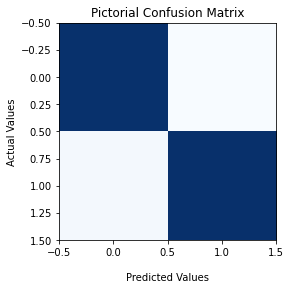

In [26]:
from sklearn.linear_model import LogisticRegression
model_lgr=LogisticRegression(max_iter=200)
training_func(model_lgr,"'Logistic Regression'")

## 2. Passive Aggressive Classifier

The accuracy of 'Passive Aggressive Classifier' model is 93.37016574585635
The confusion matrix is : 
 [[580  46]
 [ 38 603]]


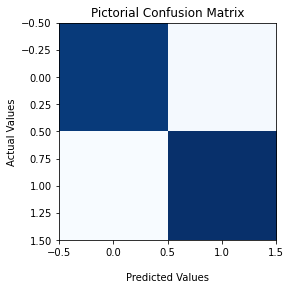

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
model_pac=PassiveAggressiveClassifier(max_iter=200)
training_func(model_pac,"'Passive Aggressive Classifier'")

## 3. Stocastic Gradient Descent

The accuracy of 'Stocastic Gradient Descent' model is 93.1333859510655
The confusion matrix is : 
 [[580  46]
 [ 41 600]]


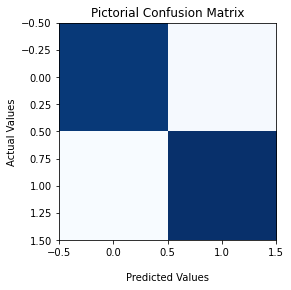

In [28]:
from sklearn.linear_model import SGDClassifier
model_sgdc = SGDClassifier(max_iter=200)
training_func(model_sgdc,"'Stocastic Gradient Descent'")

## 4. Decision Tree

The accuracy of Decision Tree Classifier model is 79.7947908445146
The confusion matrix is : 
 [[501 125]
 [131 510]]


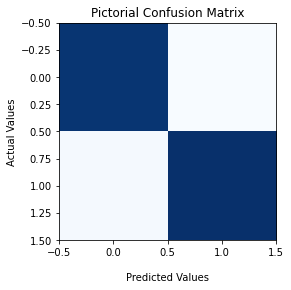

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=200)
training_func(model_dt,"Decision Tree Classifier")

### Testing

In [30]:
import re
def text_input_clean(sample):
    sample = re.sub('[^a-zA-Z]', ' ',sample)
    sample = sample.lower()
    sample = sample.split()
    sample=stop_this(sample)
    sample = ' '.join(sample)
    new_corpus = [sample]
    new_X_test = mtfidf.transform(new_corpus).toarray()
    
    return new_X_test

In [32]:
text_input = input('Enter a piece of text: ')
new_X_test = text_input_clean(text_input)
test_y_pred = model_pac.predict(new_X_test)
print(test_y_pred)

['FAKE']
